# ECE 657A ASSIGNMENT 3
## Climate Fever Dataset

###### Jubilee Imhanzenobe and Olohireme Ajayi

In [78]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec, KeyedVectors
from datasets import load_dataset
import gensim.downloader as api

In [2]:
# downloading nltk.punkt
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

#### Defining relevant functions

In [3]:
def word_cloud_plot (data):
    """
    function that creates a word cloud from a specified column of a dataframe 
    """
    # create set of stopwords
    stopwords = set(STOPWORDS)

    # Instantiate the word cloud object
    word_cloud = WordCloud(background_color='white',max_words=200,stopwords=stopwords, width=800, height=400)
    
    # generate the word cloud
    word_cloud.generate(' '.join(data))
    
    # To display the word cloud
    plt.figure( figsize=(20,10) )
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [4]:
def regex_filter(sentence):
    """
    funtion that formats string to remove special characters
    """
    import re
    return re.sub('[^a-zA-Z]', ' ', sentence)

In [5]:
def filter_stop_words(token):
    """
    function that removes stopwords from a word-tokenized sentence
    """
    stop_words = set(stopwords.words('english'))
    filtered_token = [word.lower() for word in token if word.lower() not in stop_words]
    return filtered_token

In [6]:
def stem_words(token):
    """
    function that stems word-tokenized sentences
    """
    ps = PorterStemmer()
    stemmed_token = [ps.stem(word) for word in token]
    return stemmed_token

In [7]:
def lemmatize_words(token):
    """
    function that lemmatizes word-tokenized sentences
    """
    lem = WordNetLemmatizer()
    lemmatized_token = [lem.lemmatize(word, 'v') for word in token]
    return lemmatized_token

In [8]:
def join_token(token):
    """
    function that joins word-tokenized sentences back to single string
    """
    return ' '.join(token)

In [9]:
def similarity(words, stem_model=None, lem_model=None, W2V_pretrained=None, GloVe_pretrained=None):
    if stem_model:
        ps = PorterStemmer()
        stemmed = [ps.stem(word) for word in words]
        try:
            print("Stemmed W2V model similarity between", words[0], "and", words[1], "=", stem_model.wv.similarity(stemmed[0], stemmed[1]))
        except:
            print("Error: Word not in stem model vocabulary")
    
    if lem_model:
        lem = WordNetLemmatizer()
        lemma = [lem.lemmatize(word, 'v') for word in words]
        try:
            print("Lemmatized W2V model similarity between", words[0], "and", words[1], "=", lem_model.wv.similarity(lemma[0], lemma[1]))
        except:
            print("Error: Word not in lemmatized model vocabulary")        
    
    if W2V_pretrained:
        try:
            print("Word2vec pretrained model similarity between", words[0], "and", words[1], "=", W2V_pretrained.wv.similarity(words[0], words[1]))
        except:
            print("Error: Word not in Word2vec pretrained model vocabulary")
    
    if GloVe_pretrained:
        try:
            print("GloVe pretrained model similarity between", words[0], "and", words[1], "=", GloVe_pretrained.similarity(words[0], words[1]))
        except:
            print("Error: Word not in GloVe pretrained model vocabulary")    

#### Downloading the dataset

In [10]:
dataset = load_dataset('climate_fever')

df = dataset['test'].to_pandas()
df2 = pd.json_normalize(dataset['test'], 'evidences', ['claim', 'claim_id','claim_label'], errors='ignore',record_prefix='Evidence_')

data1 = df[['claim', 'claim_label']]
data2 = df2[['Evidence_evidence','Evidence_evidence_label']]

Using custom data configuration default
Reusing dataset climate_fever (C:\Users\jubil\.cache\huggingface\datasets\climate_fever\default\1.0.1\3b846b20d7a37bc0019b0f0dcbde5bf2d0f94f6874f7e4c398c579f332c4262c)


#### Histogram plot of claim labels and evidence labels

<AxesSubplot:xlabel='Evidence_evidence_label', ylabel='Count'>

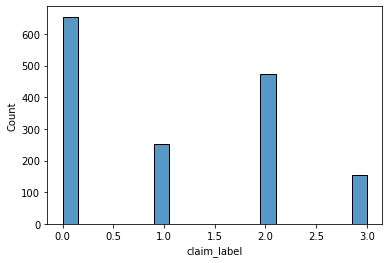

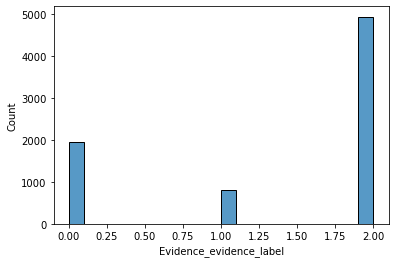

In [11]:
plt.figure()
sns.histplot(data = data1, x ='claim_label', bins = 20)
plt.figure()
sns.histplot(data = data2, x ='Evidence_evidence_label', bins = 20)

#### Word cloud of the claims in the dataset

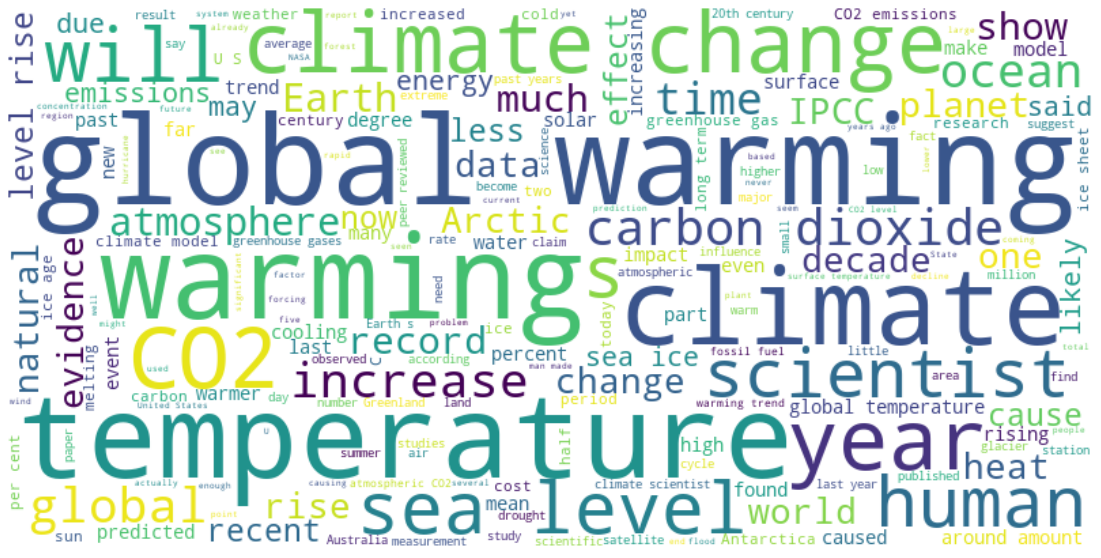

In [12]:
# visualizing word frequency in all claims
word_cloud_plot(data1['claim'])

#### Data preparation

In [13]:
# filter with regex
data1.loc[:, 'claim_token'] = data1.loc[:, 'claim'].apply(regex_filter)

# Tokenizing the claims
data1.loc[:, 'claim_token'] = data1.loc[:, 'claim_token'].apply(nltk.word_tokenize)

# Removing stop words from the claclaim_tokenim tokens
data1.loc[:,'claim_token'] = data1.loc[:,'claim_token'].apply(filter_stop_words)

# Stemming the words
data1.loc[:,'stemmed_words'] = data1.loc[:,'claim_token'].apply(stem_words)

# lemmatizing the words
data1.loc[:,'lemmatized_words'] = data1.loc[:,'claim_token'].apply(lemmatize_words)

C:\Users\jubil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\jubil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [14]:
data1.head()

,claim,claim_label,claim_token,stemmed_words,lemmatized_words
0,Global warming is driving polar bears toward e...,0,"[global, warming, driving, polar, bears, towar...","[global, warm, drive, polar, bear, toward, ext...","[global, warm, drive, polar, bear, toward, ext..."
1,The sun has gone into ‘lockdown’ which could c...,0,"[sun, gone, lockdown, could, cause, freezing, ...","[sun, gone, lockdown, could, caus, freez, weat...","[sun, go, lockdown, could, cause, freeze, weat..."
2,The polar bear population has been growing.,1,"[polar, bear, population, growing]","[polar, bear, popul, grow]","[polar, bear, population, grow]"
3,Ironic' study finds more CO2 has slightly cool...,1,"[ironic, study, finds, co, slightly, cooled, p...","[iron, studi, find, co, slightli, cool, planet]","[ironic, study, find, co, slightly, cool, planet]"
4,Human additions of CO2 are in the margin of er...,1,"[human, additions, co, margin, error, current,...","[human, addit, co, margin, error, current, mea...","[human, additions, co, margin, error, current,..."


#### Word cloud of the claims in the dataset (after data preparation)

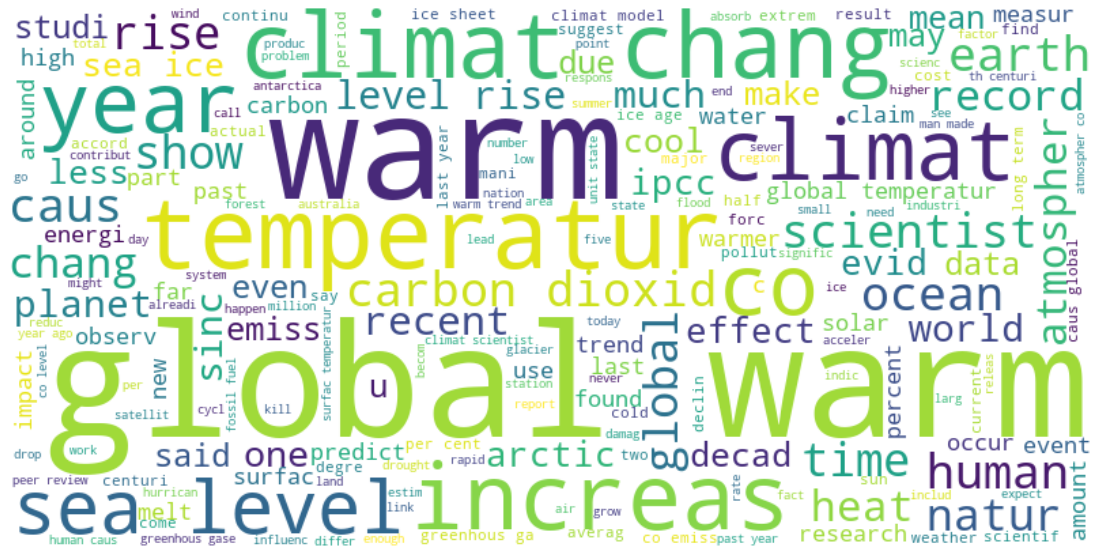

In [15]:
# Visualizing the word cloud again
word_cloud_plot(data1['stemmed_words'].apply(join_token))

#### Creating the corpus

In [22]:
from sklearn.model_selection import train_test_split
train_stem, test_stem = train_test_split(data1['stemmed_words'], test_size=0.2, random_state=0)
val_stem, test_stem = train_test_split(test_stem, test_size=0.2, random_state=0)


train_lem, test_lem = train_test_split(data1['lemmatized_words'], test_size=0.2, random_state=0)
val_lem, test_lem = train_test_split(test_lem, test_size=0.2, random_state=0)

In [23]:
# creating the stemmed corpus and lemmatized corpus
corpus_stem_train = list(train_stem)
corpus_lem_train = list(train_lem)

In [24]:
# getting the length of unique stemmed words
unique_set = [word for token in corpus_stem_train for word in token]
unique_set = set(unique_set)
len(unique_set)

2703

In [25]:
# getting the length of unique lemmatized words
unique_set2 = [word for token in corpus_lem_train for word in token]
unique_set2 = set(unique_set2)
len(unique_set2)

3013

#### Building the Word2Vec model

In [26]:
# Embeding with Word2Vec
model_stem_claim = Word2Vec(corpus_stem_train, min_count=2)
model_lem_claim = Word2Vec(corpus_lem_train, min_count=2)

In [27]:
words_list = [['man', 'bear'],['heat', 'warm'],['climate', 'weather'],['earth', 'global'],['man', 'bear'],['man', 'bear']]

In [28]:
for words in words_list:
    similarity(words = words, 
               stem_model = model_stem_claim, 
               lem_model = model_lem_claim
              )
    print()

Stemmed W2V model similarity between man and bear = 0.95682275
Lemmatized W2V model similarity between man and bear = 0.93769276

Stemmed W2V model similarity between heat and warm = 0.99715614
Lemmatized W2V model similarity between heat and warm = 0.99378043

Stemmed W2V model similarity between climate and weather = 0.99484414
Lemmatized W2V model similarity between climate and weather = 0.99058485

Stemmed W2V model similarity between earth and global = 0.9936718
Lemmatized W2V model similarity between earth and global = 0.9903452

Stemmed W2V model similarity between man and bear = 0.95682275
Lemmatized W2V model similarity between man and bear = 0.93769276

Stemmed W2V model similarity between man and bear = 0.95682275
Lemmatized W2V model similarity between man and bear = 0.93769276



#### Adding the evidences to the corpus

In [29]:
# Adding the evidences to increase corpus size

# filer with regex
data2.loc[:, ('evidence_token')] = data2.loc[:, ('Evidence_evidence')].apply(regex_filter)

# Tokenizing the claims
data2.loc[:, ('evidence_token')] = data2.loc[:, ('evidence_token')].apply(nltk.word_tokenize)

# Removing stop words from the evidence_token tokens
data2.loc[:,('evidence_token')] = data2.loc[:,('evidence_token')].apply(filter_stop_words)

# Stemming the words
data2.loc[:,('stemmed_words')] = data2.loc[:,('evidence_token')].apply(stem_words)

# lemmatizing the words
data2.loc[:,('lemmatized_words')] = data2.loc[:,('evidence_token')].apply(lemmatize_words)

C:\Users\jubil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\jubil\Anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### Word cloud of the evidences in the dataset (after data preparation)

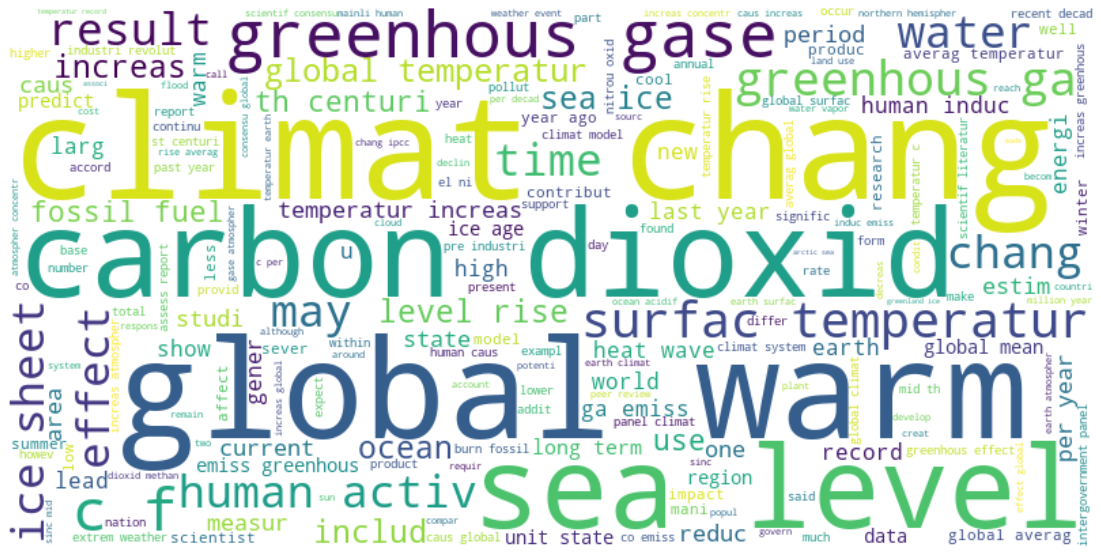

In [30]:
# Visualizing the word cloud of the evidences
word_cloud_plot(data2['stemmed_words'].apply(join_token))

#### Adding the evidences to the corpus

In [37]:
df_stem = pd.concat([data1['stemmed_words'], data2['stemmed_words']])
df_lem = pd.concat([data1['lemmatized_words'], data2['lemmatized_words']])

In [38]:
from sklearn.model_selection import train_test_split
train_stem, test_stem = train_test_split(df_stem, test_size=0.2, random_state=0)
val_stem, test_stem = train_test_split(test_stem, test_size=0.2, random_state=0)


train_lem, test_lem = train_test_split(df_lem, test_size=0.2, random_state=0)
val_lem, test_lem = train_test_split(test_lem, test_size=0.2, random_state=0)

In [39]:
# adding the sentences in the evidence to the corpus
corpus_stem_train = list(train_stem)
corpus_lem_train = list(train_lem)

In [41]:
# getting the length of unique stemmed words
unique_set3 = [word for token in corpus_stem_train for word in token]
unique_set3 = set(unique_set3)
len(unique_set3)

6835

In [42]:
# getting the length of unique lemmatized words
unique_set4 = [word for token in corpus_lem_train for word in token]
unique_set4 = set(unique_set4)
len(unique_set4)

8286

#### Building the Word2Vec model

In [44]:
# Embeding with Word2Vec
model_stem_total = Word2Vec(corpus_stem_train, min_count=2)
model_lem_total = Word2Vec(corpus_lem_train, min_count=2)

In [45]:
for words in words_list:
    similarity(words = words, 
               stem_model = model_stem_total, 
               lem_model = model_lem_total
              )
    print()

Stemmed W2V model similarity between man and bear = 0.96733004
Lemmatized W2V model similarity between man and bear = 0.97648686

Stemmed W2V model similarity between heat and warm = 0.76186085
Lemmatized W2V model similarity between heat and warm = 0.7888804

Stemmed W2V model similarity between climate and weather = 0.7719106
Lemmatized W2V model similarity between climate and weather = 0.8285482

Stemmed W2V model similarity between earth and global = 0.90994
Lemmatized W2V model similarity between earth and global = 0.91506106

Stemmed W2V model similarity between man and bear = 0.96733004
Lemmatized W2V model similarity between man and bear = 0.97648686

Stemmed W2V model similarity between man and bear = 0.96733004
Lemmatized W2V model similarity between man and bear = 0.97648686



#### Comparing with pretrained models

In [46]:
# Loading pretrained Word2Vec model
w2v_data = api.load("text8")
W2V_pretrained = Word2Vec(w2v_data)

In [47]:
# Loading pretrained GloVe model
GloVe_pretrained = api.load("glove-wiki-gigaword-50")

In [48]:
for words in words_list:
    similarity(words = words, 
               stem_model = model_stem_total, 
               lem_model = model_lem_total, 
               W2V_pretrained = W2V_pretrained, 
               GloVe_pretrained = GloVe_pretrained
              )
    print()

Stemmed W2V model similarity between man and bear = 0.96733004
Lemmatized W2V model similarity between man and bear = 0.97648686
Word2vec pretrained model similarity between man and bear = 0.30353826
GloVe pretrained model similarity between man and bear = 0.5815115

Stemmed W2V model similarity between heat and warm = 0.76186085
Lemmatized W2V model similarity between heat and warm = 0.7888804
Word2vec pretrained model similarity between heat and warm = 0.5315956
GloVe pretrained model similarity between heat and warm = 0.6819083

Stemmed W2V model similarity between climate and weather = 0.7719106
Lemmatized W2V model similarity between climate and weather = 0.8285482
Word2vec pretrained model similarity between climate and weather = 0.6060321
GloVe pretrained model similarity between climate and weather = 0.6746836

Stemmed W2V model similarity between earth and global = 0.90994
Lemmatized W2V model similarity between earth and global = 0.91506106
Word2vec pretrained model similarit

In [50]:
model_stem_total.wv['climat']

array([-0.6583902 , -0.10672364, -0.76656574,  0.17951329,  0.44943467,
       -0.35991105,  0.49667072, -0.21333562, -0.00208361,  0.32743818,
        0.412126  , -0.00101694, -0.18451512, -0.33812633,  0.32355937,
       -0.28762898, -0.14049625,  0.29801843, -0.20466167,  0.19286461,
       -0.4709468 , -0.71239376,  0.17787138,  0.48818457, -0.0162872 ,
        0.30681235, -0.2059791 , -0.15687501,  0.19544439,  0.7797933 ,
        0.04759626,  0.4631558 ,  1.0119444 , -0.12248203, -0.13509902,
        0.21259311,  0.4346036 ,  0.0127485 , -0.98333895, -0.22175954,
        0.05134103, -0.00802159,  0.41914988,  0.09069943, -0.59258723,
       -0.43883505, -0.8705888 , -0.7872295 ,  0.5404432 , -0.23775807,
        0.01786163, -0.7015696 ,  0.5242699 , -0.819889  ,  0.0752954 ,
       -0.08950272,  0.00521958,  0.3719025 ,  0.83973235,  0.3314222 ,
       -0.19426844,  0.48907477,  0.16637959, -0.06293515, -0.08053096,
       -0.7440341 , -0.6416361 ,  0.57666075,  0.0457978 ,  0.34

In [57]:
len(model_stem_total.wv.vocab)

4238

In [134]:
labels_stem = []
tokens_stem = []

for word in model_stem_total.wv.vocab:
    tokens_stem.append(list(model_stem_total.wv.__getitem__(word)))
    labels_stem.append(word)

tokens_stem = np.array(tokens_stem)
tokens_stem.shape

(4238, 100)

In [136]:
labels_lem = []
tokens_lem = []

for word in model_lem_total.wv.vocab:
    tokens_lem.append(list(model_lem_total.wv.__getitem__(word)))
    labels_lem.append(word)

tokens_lem = np.array(tokens_lem)
tokens_lem.shape

(4943, 100)

## PCA

In [184]:
from sklearn.decomposition import PCA
n_components = [1, 2, 3, 5, 7, 10, 20, 30]
explained_variance = []
log_likelihood = []
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit_transform(tokens_stem)
    explained_variance.append(1 - sum(pca.explained_variance_ratio_))
    log_likelihood.append(pca.score(tokens_stem))

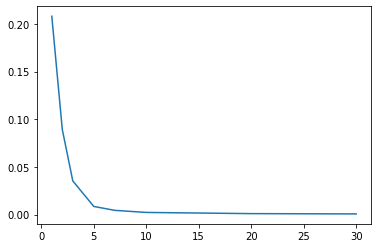

In [186]:
plt.plot(n_components, explained_variance)

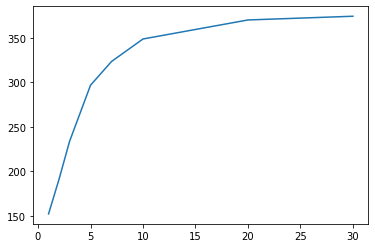

In [176]:
plt.plot(n_components, log_likelihood)

## TSNE

In [83]:
from sklearn.manifold import TSNE

In [112]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=0)
tsne_vectors = tsne_model.fit_transform(tokens_stem)

In [120]:
df_viz = pd.DataFrame(tsne_vectors, columns = ["feature1", "feature2"])
df_viz["labels"] = labels_stem
df_viz = df_viz.sample(200)

In [121]:
def tsne_plot(df):        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(df)):
        plt.scatter(df.iloc[i,0],df.iloc[i,1])
        plt.annotate(df.iloc[i,2],
                     xy=(df.iloc[i,0], df.iloc[i,1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

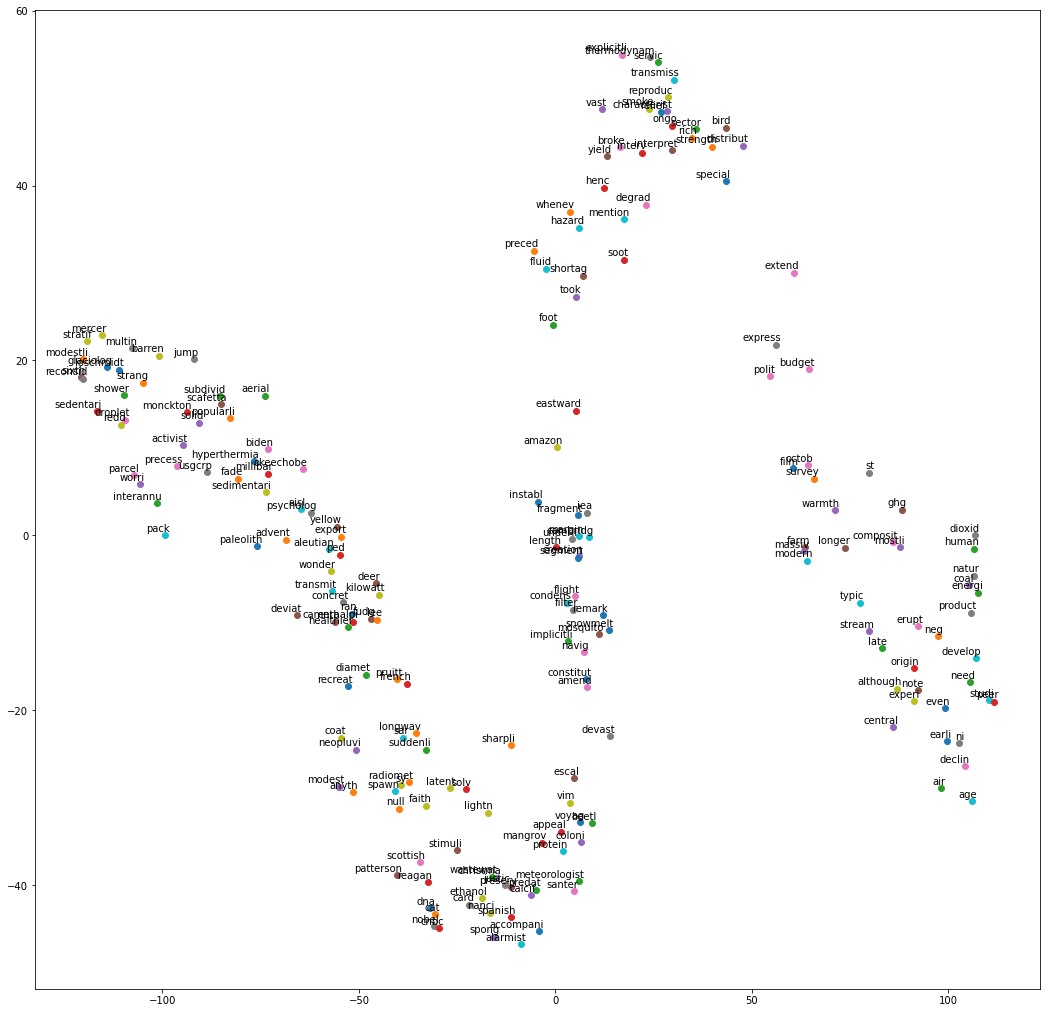

In [122]:
tsne_plot(df_viz)

In [123]:
tsne_model.kl_divergence_

0.9163303375244141

In [124]:
tsne_model.n_iter_

2499

### Using Lemmatization

In [137]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=0)
tsne_vectors = tsne_model.fit_transform(tokens_lem)

In [138]:
df_viz2 = pd.DataFrame(tsne_vectors, columns = ["feature1", "feature2"])
df_viz2["labels"] = labels_lem
df_viz2 = df_viz2.sample(200)

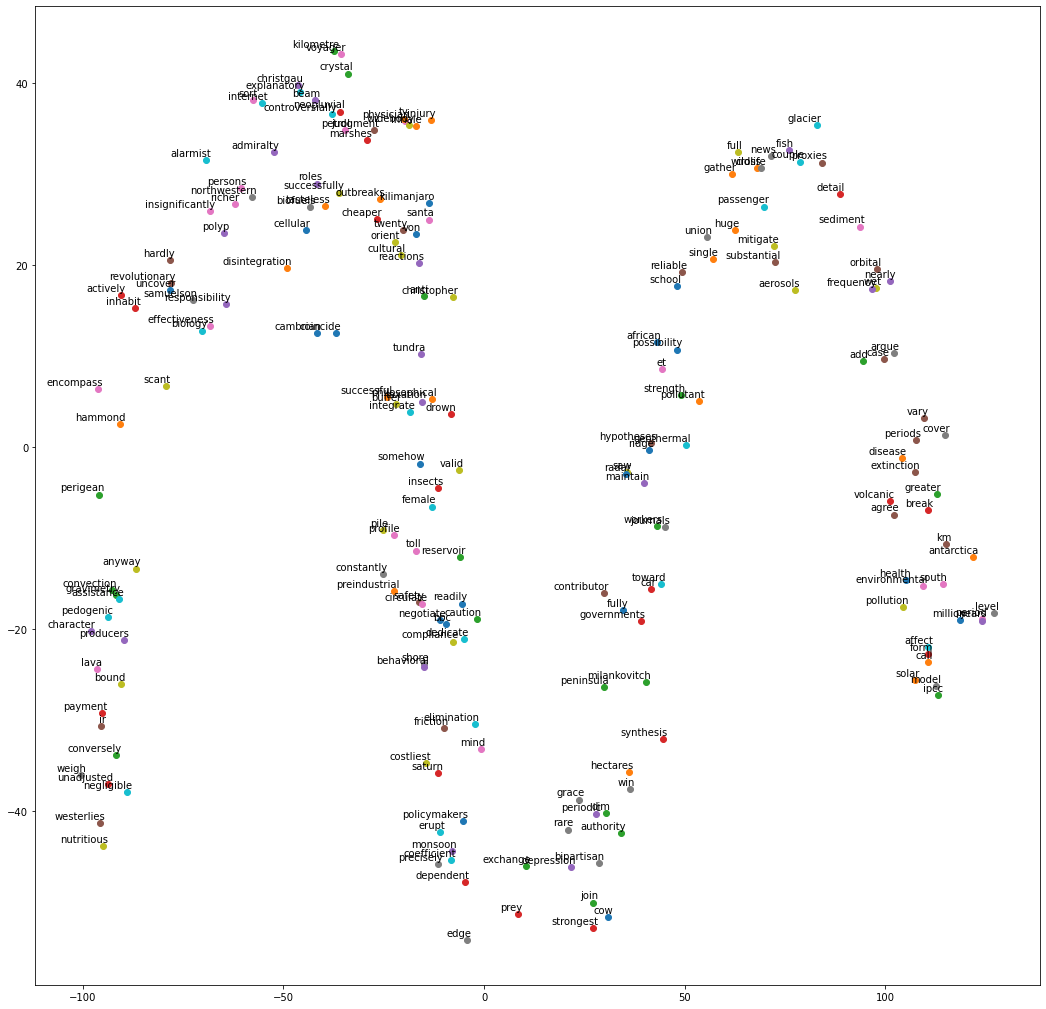

In [141]:
tsne_plot(df_viz2)

In [142]:
tsne_model.kl_divergence_

0.9728904366493225

In [143]:
tsne_model.n_iter_

2499